In [5]:
#importing required libraries

import pandas as pd
import numpy as np


In [6]:
colNames = ["erythema" , "scaling", "definite_borders", "itching", "koebner_phenomenon", "polygonal_papules", "follicular_papules", "oral_mucosal_involvement", "knee and elbow involvement", "scalp_involvement", "family_history",
"melanin_incontinence","eosinophils_in_the_infiltrate", "PNL_infiltrate", "fibrosis_of_the_papillary_dermis", "exocytosis", "acanthosis", "hyperkeratosis", "parakeratosis", "clubbing_of_the_rete_ridges", "elongation_of_the_rete_ridges", "thinning_of_the_suprapapillary_epidermis", "spongiform_pustule", "munro_microabcess", "focal_hypergranulosis", "disappearance_of_the_granular_layer", "vacuolisation_and_damage_of_basal_layer", "spongiosis", "saw-tooth_appearance_of_retes", "follicular_horn_plug", "perifollicular_parakeratosis", "inflammatory_monoluclear_inflitrate", "band-like_infiltrate", "Age", "Disease"]

In [8]:
dataset = pd.read_csv('./DATABASE/dermatology.data', na_values='?', names=colNames)

In [9]:
dataset.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee and elbow involvement,scalp_involvement,...,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,Disease
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45.0,3


In [10]:
dataset.isna().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee and elbow involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [8]:
dataset.dtypes

erythema                                      int64
scaling                                       int64
definite_borders                              int64
itching                                       int64
koebner_phenomenon                            int64
polygonal_papules                             int64
follicular_papules                            int64
oral_mucosal_involvement                      int64
knee and elbow involvement                    int64
scalp_involvement                             int64
family_history                                int64
melanin_incontinence                          int64
eosinophils_in_the_infiltrate                 int64
PNL_infiltrate                                int64
fibrosis_of_the_papillary_dermis              int64
exocytosis                                    int64
acanthosis                                    int64
hyperkeratosis                                int64
parakeratosis                                 int64
clubbing_of_

In [12]:
dataset['Age']= np.int64(dataset['Age'])
dataset.dtypes

erythema                                    int64
scaling                                     int64
definite_borders                            int64
itching                                     int64
koebner_phenomenon                          int64
polygonal_papules                           int64
follicular_papules                          int64
oral_mucosal_involvement                    int64
knee and elbow involvement                  int64
scalp_involvement                           int64
family_history                              int64
melanin_incontinence                        int64
eosinophils_in_the_infiltrate               int64
PNL_infiltrate                              int64
fibrosis_of_the_papillary_dermis            int64
exocytosis                                  int64
acanthosis                                  int64
hyperkeratosis                              int64
parakeratosis                               int64
clubbing_of_the_rete_ridges                 int64


In [13]:
# importing required libraries to impute missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=20, random_state=7)
imp.fit(dataset)
dataset = np.int64(imp.transform(dataset))
dataset = pd.DataFrame(dataset, columns=colNames)




In [14]:
# confirming if null values imputed
dataset['Age'].isna().sum()

0

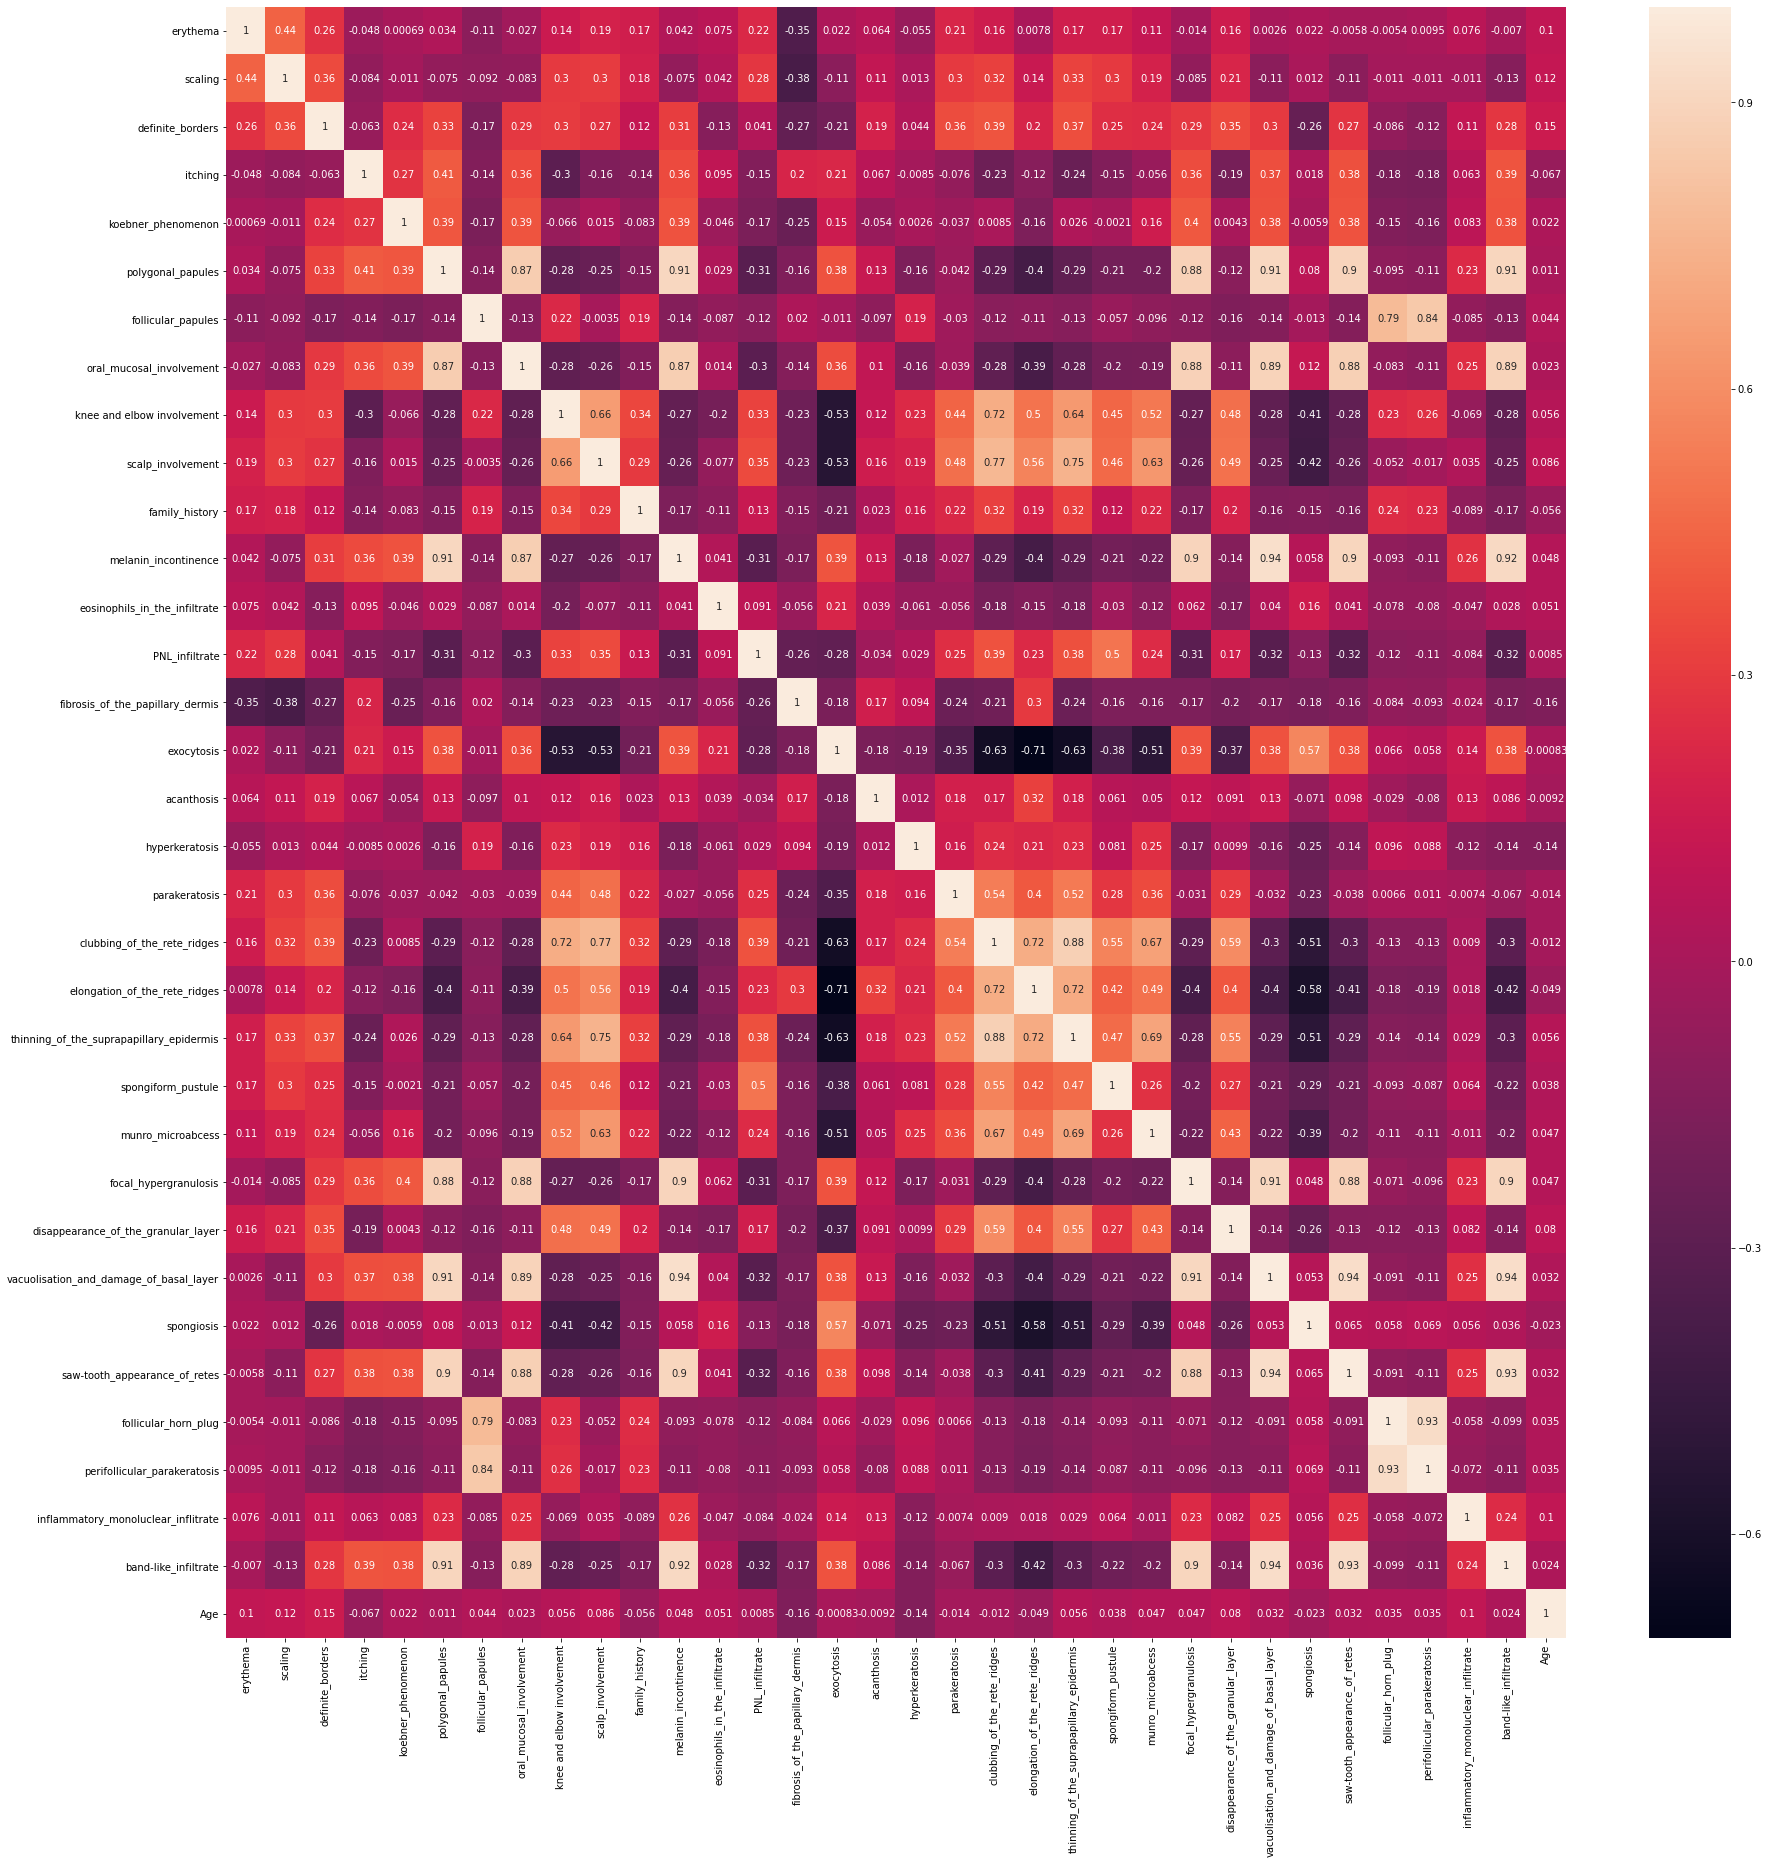

In [16]:
# now coming to Feature Selection

import seaborn as sns
import matplotlib.pyplot as plt
corr = dataset.iloc[:, :-1].corr() # except last target column
top_features = corr.index
plt.figure(figsize=(30,30))
sns.heatmap(dataset[top_features].corr(), annot=True)

In [22]:
# remove the highly correlated attributes except target
# both these attributes are doing same work
# so we can neglect one of them

# finding and remove correlated attributes

def correlation(df, threshold):
    corr_col = set() # unique columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold: # checking absolute coeff difference
                col_name = corr_matrix.columns[i] # getting the name of colummnd
                corr_col.add(col_name)


    return corr_col

In [23]:
threshold = 0.8 # drop atrribute > 0.9

df = dataset.iloc[:, :-1]
correlated_features = correlation(df, threshold) # correlated columns

print(len(correlated_features))
print(correlated_features)


# 8 columns are redundant. so, seven of them can be excluded

8
{'perifollicular_parakeratosis', 'saw-tooth_appearance_of_retes', 'band-like_infiltrate', 'focal_hypergranulosis', 'melanin_incontinence', 'thinning_of_the_suprapapillary_epidermis', 'vacuolisation_and_damage_of_basal_layer', 'oral_mucosal_involvement'}


In [24]:
newCols= list(correlated_features)
newCols =newCols[1:] 


# prepraring new dataset by excluding redundant features
newDataset = dataset.copy()
#newDataset.shape
newDataset.drop(columns=newCols, inplace=True) # driopping all the redundant columns 
newDataset.shape

(366, 28)

In [25]:
newCols


['saw-tooth_appearance_of_retes',
 'band-like_infiltrate',
 'focal_hypergranulosis',
 'melanin_incontinence',
 'thinning_of_the_suprapapillary_epidermis',
 'vacuolisation_and_damage_of_basal_layer',
 'oral_mucosal_involvement']

In [27]:
from sklearn.model_selection import train_test_split
array = newDataset.values
X = array[:, 0:-1] # all rows taken, all columns except last one
Y = array[:, -1] # all rows takne, only last column taken

# splitting training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=7)


In [28]:
# Standardising the dataset by standard variance
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [32]:
# K Neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train_sc,y_train)
y_pred=clf.predict(x_test_sc)
#print(y_pred)

print(clf.score(x_test_sc, y_test))
print('misclassified samples:%d'%(y_test!=y_pred).sum())
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy score %.2f'%accuracy_score(y_test,y_pred))

0.972972972972973
misclassified samples:2
[[23  1  0  0  0  0]
 [ 0 10  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  1  0 13  0  0]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0  0  4]]
              precision    recall  f1-score   support

           1       1.00      0.96      0.98        24
           2       0.83      1.00      0.91        10
           3       1.00      1.00      1.00        11
           4       1.00      0.93      0.96        14
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00         4

    accuracy                           0.97        74
   macro avg       0.97      0.98      0.98        74
weighted avg       0.98      0.97      0.97        74

Accuracy score 0.97
